#Alignment of Barcodes

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import numpy as np


These are the four barcodes in DreamID 1:

In [0]:
barcode = ['2012210001', '2012210001', '2212210001', '2112210001']

Define a hypothetical scoring matrix:

In [0]:
score_matrix = np.array([[2,6,10],[6,0,4],[10,4,3]])
score_matrix

array([[ 2,  6, 10],
       [ 6,  0,  4],
       [10,  4,  3]])

Define a simple "alignment" function for aligning the two bardes: 
(Note: since we don;t need to deal with gaps here, DP is no longer necessary)

In [0]:
def global_alignment(x, y):
    #The inital state is 1111111111

    score = 0 # alignment score
    score_matrix = np.array([[2,6,10],[6,0,4],[10,4,3]])
    symbol = ''

    for i in range(10):
        score += score_matrix[int(x[i]), int(y[i])] # update score
        if x[i] == y[i]:
            symbol += '|'
        else:
            symbol += '.'

    return x, symbol, y, score


Aligning a pair of barcodes:

In [0]:
xalign, symbol ,yalign, score = global_alignment(barcode[2],barcode[3])
print(xalign)
print(symbol)
print(yalign)
print("score:", score)

2212210001
|.||||||||
2112210001
score: 19


Run all pairwise alignments for a set of barcodes, then save the result in a symmetrical matrix:

In [0]:
distance_matrix = np.zeros([len(barcode),len(barcode)], dtype=int)

for i in range(len(barcode)):
    for j in range(i+1, len(barcode)):
        xalign, symbol ,yalign, score = global_alignment(barcode[i], barcode[j])
        distance_matrix[i,j] = score
        distance_matrix[j,i] = score

distance_matrix


array([[ 0, 17, 25, 21],
       [17,  0, 25, 21],
       [25, 25,  0, 19],
       [21, 21, 19,  0]])

Generate the dendrogram:

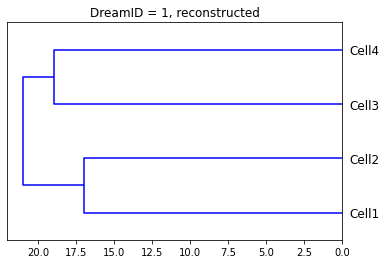

In [0]:
dists = squareform(distance_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["Cell1", "Cell2", "Cell3", "Cell4"], orientation='left')
plt.title("DreamID = 1, reconstructed")
plt.show()